# Import libraries 

In [ ]:
# Uncomment the below line and Install 'mlxtend' Library if not installed already
!pip install mlxtend # for data analysis and machine learning tasks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlxtend #importing mlxtend  the library

In [ ]:
import pandas as pd #importing pandas library for data handling and manipulation
from mlxtend.frequent_patterns import apriori,association_rules #1)apriori for used mining frequent products sets and relevant association rules(making sets of items) 2)association_rules for Function to generate association rules
from mlxtend.preprocessing import TransactionEncoder #Encodes database transaction data in form of a Python list of lists into a NumPy array


In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/Titanic(ap).csv") #storing dataset in titanic
titanic #printing dataset

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [ ]:
titanic['Class'].value_counts() #printing unique values for class column

Crew    885
3rd     706
1st     325
2nd     285
Name: Class, dtype: int64

# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [ ]:
df=pd.get_dummies(titanic) #get_dummies for converting  a categorical variable to indicator/dummy variables (columns).
df.head() #printing first five column

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


# Apriori Algorithm 

In [ ]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True) #apriori will create item set and we have used column name and we have given minimum support as 0.1
frequent_itemsets #printing  rules through apriori algorithm

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0) #Generating Association Rules from Frequent Itemsets and threshold as 1 because its minimum ratio for lift 
rules #printing association rules 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
1,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
2,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
3,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,0.022745,1.052040
4,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
...,...,...,...,...,...,...,...,...,...
69,"(Age_Adult, Survived_No)","(Class_Crew, Gender_Male)",0.653339,0.391640,0.304407,0.465925,1.189676,0.048533,1.139090
70,(Class_Crew),"(Gender_Male, Age_Adult, Survived_No)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802
71,(Gender_Male),"(Class_Crew, Age_Adult, Survived_No)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622
72,(Age_Adult),"(Class_Crew, Gender_Male, Survived_No)",0.950477,0.304407,0.304407,0.320268,1.052103,0.015075,1.023334


sorting columns for 1st 20 columns in ascending order and throse who have same lift ratio we should compress it 

In [ ]:
rules.sort_values('lift',ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
12,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
17,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
16,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
20,(Gender_Male),"(Class_3rd, Survived_No)",0.786461,0.239891,0.191731,0.243790,1.016252,0.003066,1.005156
19,"(Class_3rd, Survived_No)",(Gender_Male),0.239891,0.786461,0.191731,0.799242,1.016252,0.003066,1.063667
49,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
52,(Age_Adult),"(Gender_Male, Survived_No)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660
24,(Class_3rd),"(Age_Adult, Survived_No)",0.320763,0.653339,0.216265,0.674221,1.031961,0.006698,1.064097
23,"(Age_Adult, Survived_No)",(Class_3rd),0.653339,0.320763,0.216265,0.331015,1.031961,0.006698,1.015325


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09df4c6b90>,
      dtype=object)

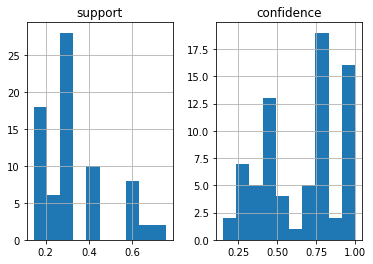

In [ ]:
rules[['support','confidence']].hist()  #ploting histogram for support confidence column (it is done just to show distribution)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09df4c0e90>,
      dtype=object)

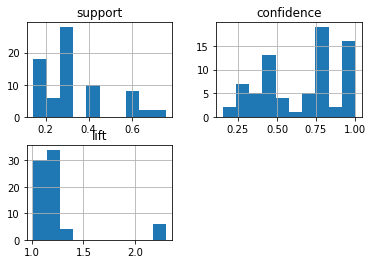

In [ ]:
rules[['support','confidence','lift']].hist() #ploting histogram for 'support','confidence','lift' column (because these are important column for us)(it is done just to show distribution)

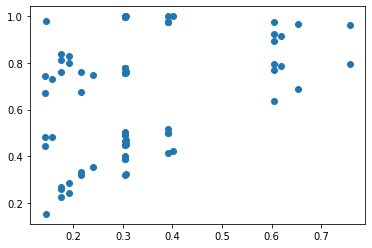

In [ ]:
import matplotlib.pyplot as plt #importing pyplot module from matplotlib for data visualization including seaborn as sns 


plt.scatter(rules['support'], rules['confidence']) #scatter plot for support and confidence column (just to show distribution)
plt.show() #printing the scatter plot 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


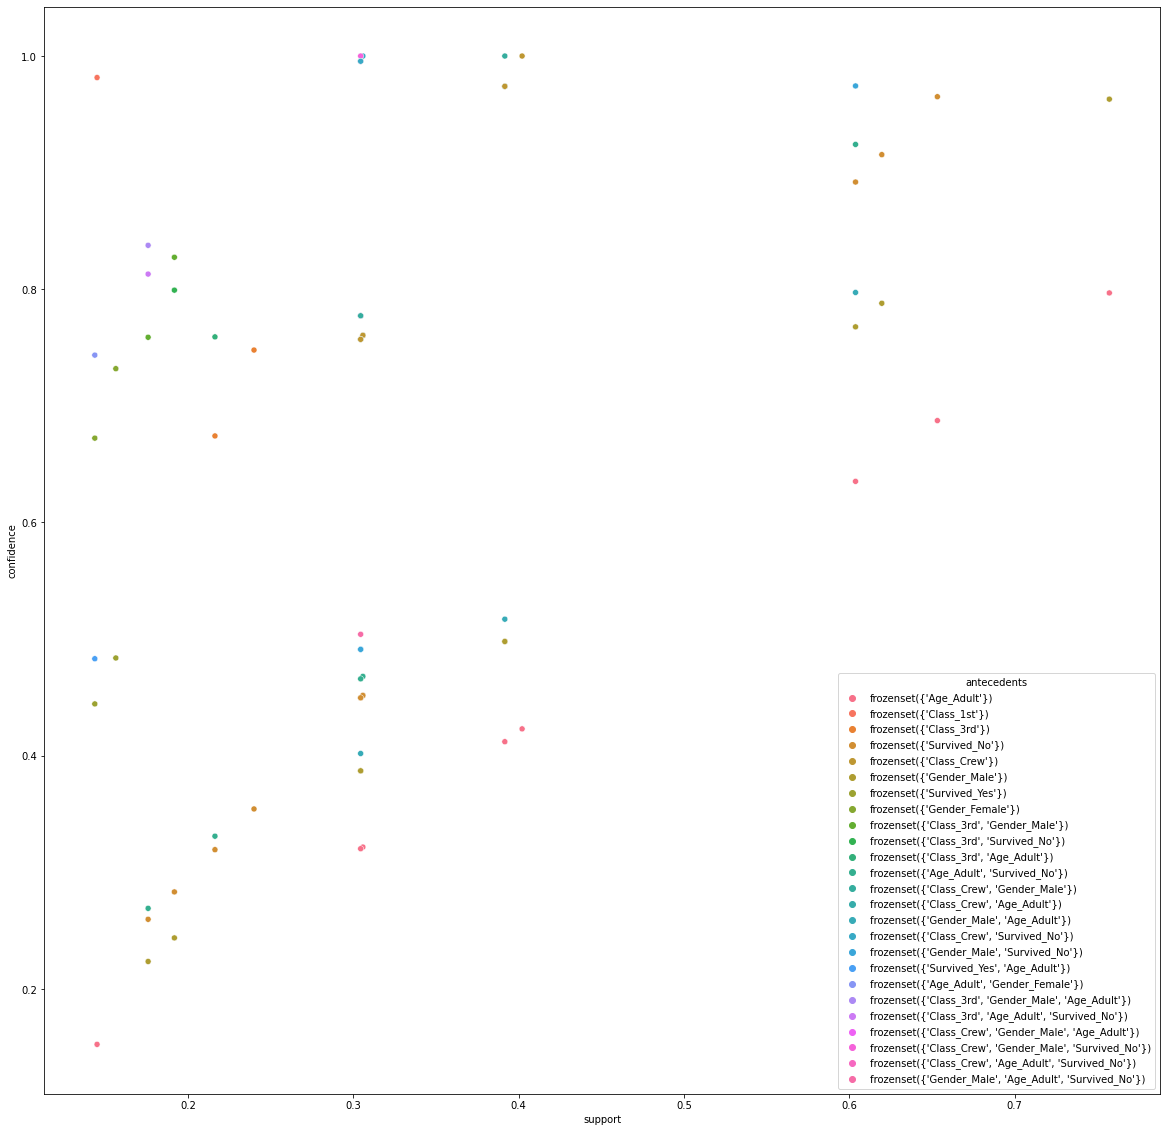

In [ ]:
#seaborn for data visualization 
import seaborn as sns
#scatterplot for support and confidence column
fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')

plt.show()